In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('data/mainData.xlsx',sheet_name = 'Final Data workings')

In [3]:
df.columns
df[0:10][:]
display(df)
# df = df.drop('Remarks', axis=1)
# df = df.dropna()

,sampleno,eqptcode,StnFdr,MakeSlNo,sdate,totalgas,n2,o2,h2,ch4,c2h4,c2h6,c2h2,co,co2,Status,Remarks
0,400017,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-03,3.70,2.76,0.91,8.0,2.0,1.0,0.0,0.0,102.0,207.0,Healthy,NaN
1,400164,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-05,3.51,2.63,0.84,11.0,2.0,1.0,0.0,0.0,121.0,306.0,Healthy,NaN
2,401680,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-10,3.54,2.70,0.80,11.0,2.0,1.0,0.0,0.0,124.0,319.0,Healthy,NaN
3,405718,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-28,3.50,2.70,0.72,16.0,3.0,2.0,0.0,0.0,187.0,517.0,Healthy,NaN
4,424780,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-11-07,3.22,2.68,0.39,25.0,5.0,3.0,0.0,0.0,372.0,1078.0,Healthy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13571,601234,9332,WARANGAL - ICT-3,TBEA - K0363,2021-09-11,1.53,1.23,0.14,0.0,4.0,1.0,1.0,0.0,394.0,1300.0,Healthy,NaN
13572,611170,9332,WARANGAL - ICT-3,TBEA - K0363,2021-10-16,1.44,1.10,0.14,0.0,5.0,0.0,2.0,0.0,345.0,1227.0,Healthy,NaN
13573,635938,9332,WARANGAL - ICT-3,TBEA - K0363,2022-01-26,1.15,1.21,0.14,0.0,0.0,1.0,1.0,0.0,377.0,1204.0,Healthy,NaN
13574,638732,9332,WARANGAL - ICT-3,TBEA - K0363,2022-02-07,1.71,1.36,0.18,0.0,5.0,1.0,1.0,0.0,412.0,1255.0,Healthy,NaN


In [4]:
gases = {
    "h2" : 1,
    "ch4": 1,
    "c2h4": 1,
    "c2h6": 1,
    "c2h2": 1,
}

In [5]:
df['Status'] = df['Status'].replace("Healthy", 0)
df['Status'] = df['Status'].replace("Faulty", 1)
for i in gases.keys():
    df[i] = df[i] + 0.01
df['co2'] = df['co2'] + 0.01

In [6]:
#feature generation logic
twoGasRatios = []
threeGasRatios = []
gasList = list(gases.keys())
for i in range(len(gasList)):
    for j in range(i+1, len(gasList)):
        twoGasRatios.append([gasList[i], gasList[j]])
        for k in range(j+1, len(gasList)):
            threeGasRatios.append([gasList[i], gasList[j], gasList[k]])
twoGasRatios
threeGasRatios

[['h2', 'ch4', 'c2h4'],
 ['h2', 'ch4', 'c2h6'],
 ['h2', 'ch4', 'c2h2'],
 ['h2', 'c2h4', 'c2h6'],
 ['h2', 'c2h4', 'c2h2'],
 ['h2', 'c2h6', 'c2h2'],
 ['ch4', 'c2h4', 'c2h6'],
 ['ch4', 'c2h4', 'c2h2'],
 ['ch4', 'c2h6', 'c2h2'],
 ['c2h4', 'c2h6', 'c2h2']]

In [7]:
from dataFormat import twoGasRatioUtil
for i in range(len(twoGasRatios)):
    col1 = twoGasRatios[i][0]
    col2 = twoGasRatios[i][1]
    df[col1 + '/' + col2] = df[col1]/df[col2]
    df[col2 + '/' + col1] = df[col2]/df[col1]


In [8]:
for i in range(len(threeGasRatios)):
    col1 = threeGasRatios[i][0]
    col2 = threeGasRatios[i][1]
    col3 = threeGasRatios[i][2]
    df["{}/({} + {} + {})".format(col1, col1, col2, col3)] = df[col1]/(df[col1] + df[col2] + df[col3])
    df["{}/({} + {} + {})".format(col2, col1, col2, col3)] = df[col2]/(df[col1] + df[col2] + df[col3])
    df["{}/({} + {} + {})".format(col3, col1, col2, col3)] = df[col3]/(df[col1] + df[col2] + df[col3])

print(df.columns, len(df.columns))

Index(['sampleno', 'eqptcode', 'StnFdr', 'MakeSlNo', 'sdate', 'totalgas', 'n2',
       'o2', 'h2', 'ch4', 'c2h4', 'c2h6', 'c2h2', 'co', 'co2', 'Status',
       'Remarks', 'h2/ch4', 'ch4/h2', 'h2/c2h4', 'c2h4/h2', 'h2/c2h6',
       'c2h6/h2', 'h2/c2h2', 'c2h2/h2', 'ch4/c2h4', 'c2h4/ch4', 'ch4/c2h6',
       'c2h6/ch4', 'ch4/c2h2', 'c2h2/ch4', 'c2h4/c2h6', 'c2h6/c2h4',
       'c2h4/c2h2', 'c2h2/c2h4', 'c2h6/c2h2', 'c2h2/c2h6',
       'h2/(h2 + ch4 + c2h4)', 'ch4/(h2 + ch4 + c2h4)',
       'c2h4/(h2 + ch4 + c2h4)', 'h2/(h2 + ch4 + c2h6)',
       'ch4/(h2 + ch4 + c2h6)', 'c2h6/(h2 + ch4 + c2h6)',
       'h2/(h2 + ch4 + c2h2)', 'ch4/(h2 + ch4 + c2h2)',
       'c2h2/(h2 + ch4 + c2h2)', 'h2/(h2 + c2h4 + c2h6)',
       'c2h4/(h2 + c2h4 + c2h6)', 'c2h6/(h2 + c2h4 + c2h6)',
       'h2/(h2 + c2h4 + c2h2)', 'c2h4/(h2 + c2h4 + c2h2)',
       'c2h2/(h2 + c2h4 + c2h2)', 'h2/(h2 + c2h6 + c2h2)',
       'c2h6/(h2 + c2h6 + c2h2)', 'c2h2/(h2 + c2h6 + c2h2)',
       'ch4/(ch4 + c2h4 + c2h6)', 'c2h4/(ch4 + 

In [9]:
faultyDf = df[df['Status'] == 1]
normalDf = df[df['Status'] == 0]

In [10]:
features = df.columns
features = features[5:]
pvalueDict = {}
for feature in features:
    if feature == "Status":
        continue
    _, result = stats.mannwhitneyu(normalDf[feature], faultyDf[feature])
    pvalueDict[feature] = result

pvalueDict = dict(sorted(pvalueDict.items(), key=lambda item: item[1]))
display(pvalueDict)

{'ch4': 0.0,
 'c2h4': 0.0,
 'c2h6': 0.0,
 'co2': 2.794707442872439e-197,
 'h2': 3.8428966739111666e-194,
 'c2h6/(h2 + ch4 + c2h6)': 3.4607120630133604e-176,
 'h2/(h2 + c2h4 + c2h6)': 3.2719772527560063e-165,
 'h2/c2h6': 2.9319490665911914e-137,
 'c2h6/h2': 2.9319490665911914e-137,
 'ch4/c2h6': 8.70949899566044e-123,
 'c2h6/ch4': 8.70949899566044e-123,
 'totalgas': 7.758292727944633e-116,
 'h2/(h2 + ch4 + c2h4)': 4.409796640760769e-110,
 'h2/c2h4': 1.1312353660608017e-108,
 'c2h4/h2': 1.1312353660608017e-108,
 'h2/(h2 + ch4 + c2h6)': 1.1781180669368093e-91,
 'ch4/h2': 6.004901055587798e-91,
 'n2': 3.826538098459723e-73,
 'c2h6/(h2 + c2h4 + c2h6)': 9.863371152449486e-68,
 'c2h6/(ch4 + c2h4 + c2h6)': 1.3323880844256113e-54,
 'c2h4/(h2 + ch4 + c2h4)': 2.954436794042436e-47,
 'ch4/(h2 + ch4 + c2h4)': 3.1408993187780313e-18,
 'ch4/c2h4': 4.491204688166759e-11,
 'c2h4/ch4': 4.491204688166759e-11,
 'o2': 8.024318701116178e-09,
 'c2h2': nan,
 'co': 0.00023875687689801353,
 'Remarks': nan,
 'h2/

<Axes: xlabel='ch4', ylabel='Proportion'>

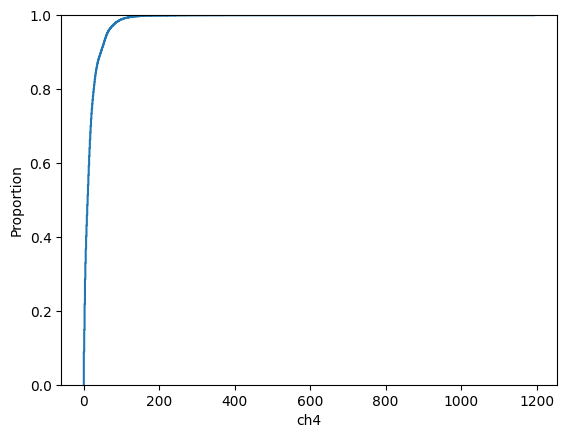

In [11]:
sns.ecdfplot(data=normalDf['ch4'])

<Axes: xlabel='ch4', ylabel='Proportion'>

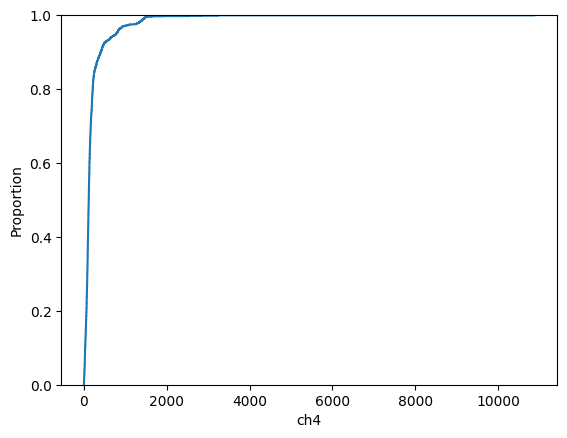

In [12]:
sns.ecdfplot(data=faultyDf['ch4'])

<Axes: xlabel='c2h2', ylabel='Proportion'>

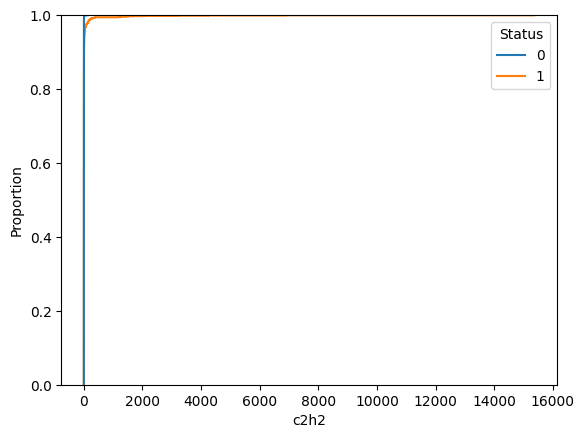

In [13]:
sns.ecdfplot(data=df, x="c2h2", hue="Status")

In [14]:
newFeatures = list(pvalueDict.keys())
newFeatures = newFeatures[:15]
thresholdsDict = {}
for feature in newFeatures:
    result = stats.ks_2samp(normalDf[feature], faultyDf[feature])
    thresholdsDict[feature] = result.statistic_location
display(thresholdsDict)
display(newFeatures)

{'ch4': 42.01,
 'c2h4': 4.01,
 'c2h6': 5.01,
 'co2': 4251.01,
 'h2': 32.01,
 'c2h6/(h2 + ch4 + c2h6)': 0.16749585406301826,
 'h2/(h2 + c2h4 + c2h6)': 0.33031715151789354,
 'h2/c2h6': 0.9873433742564233,
 'c2h6/h2': 1.0124984376952881,
 'ch4/c2h6': 3.9687973341411693,
 'c2h6/ch4': 0.2518703241895262,
 'totalgas': 3.319999933242798,
 'h2/(h2 + ch4 + c2h4)': 0.21740293616025153,
 'h2/c2h4': 0.9924817682880986,
 'c2h4/h2': 1.0}

['ch4',
 'c2h4',
 'c2h6',
 'co2',
 'h2',
 'c2h6/(h2 + ch4 + c2h6)',
 'h2/(h2 + c2h4 + c2h6)',
 'h2/c2h6',
 'c2h6/h2',
 'ch4/c2h6',
 'c2h6/ch4',
 'totalgas',
 'h2/(h2 + ch4 + c2h4)',
 'h2/c2h4',
 'c2h4/h2']

In [15]:
import pandas as pd
import random
import functools
import os
from multiprocessing import Process, Value, Array, Pool
import pickle
import numpy as np
from typing import List
import copy

# data = pd.read_excel('data/mainData.xlsx', sheet_name='Final Data workings')

fitness_dict = {}
# features = np.array(['n2', 'o2', 'h2', 'ch4'])
operators = np.array(['|', '&'])
scale_factor = 1000


In [16]:
class Node:
    def __init__(self, operator: str = None, feature_column: str = None):
        # split node
        self.operator = operator
        # leaf node
        self.feature_column = feature_column


class DecisionTree:
    def __init__(self, max_depth: int):
        self.max_depth = max_depth

        # store nodes in an array to avoid
        # left child = parent index * 2
        # right child = parent index * 2 + 1
        # root node = index 1
        l = 2 ** (max_depth + 1)
        self.nodes = [None for i in range(l)]

        # depths of each node
        self.depth_l = [0 for i in range(l)]
        # total depth of tree
        self.depth = 0

        # root node will be a split node
        root_feature = random.choice(operators)
        self.nodes[1] = Node(
            operator=root_feature
        )

    def add_node(self, par_ind: int, node_type: str):
        if node_type == "leaf":
            new_node = Node(feature_column=random.choice(newFeatures))
        elif node_type == "split":
            operator = random.choice(operators)
            new_node = Node(
                operator=operator
            )

        # check if left child exists
        if self.nodes[par_ind * 2] is None:
            next_pos = par_ind * 2
        else:
            next_pos = par_ind * 2 + 1

        self.nodes[next_pos] = new_node
        self.depth_l[next_pos] = self.depth_l[par_ind] + 1
        self.depth = max(self.depth, self.depth_l[next_pos])
        return next_pos

    def classify_one(self, index: int, row: int):
        # classify one piece of data
        node = self.nodes[index]
        if node.feature_column is not None:
            return df[node.feature_column][row] >= thresholdsDict[node.feature_column]
        left = self.classify_one(index*2, row)
        right = self.classify_one(index*2+1, row)
        if node.operator == '|':
            if left == 1 or right == 1:
                return 1
            else:
                return 0
        # if operator is &
        if left == 1 and right == 1:
            return 1
        return 0

    def display_tree(self, index: int):
        node = self.nodes[index]
        if node.feature_column is not None:
            return node.feature_column
        left = self.display_tree(index*2)
        right = self.display_tree(index*2+1)
        return '('+left+node.operator+right+')'


In [17]:
from multiprocessing import Pool
def generate_random(max_depth: int, split_p: float):
    ret = DecisionTree(max_depth)

    q = deque([1])
    while q:
        # index of the parent node
        cur = q.popleft()

        # loop twice for each child of the parent
        for _ in range(2):
            # make sure that we don't add a split node
            # at the maximum depth
            if cur * 4 < len(ret.nodes) and split_p <= random.random():
                next_pos = ret.add_node(cur, "split")
                q.append(next_pos)
            else:
                ret.add_node(cur, "leaf")

    return ret


def selection(population: List[DecisionTree], fitness: List[float], k: int):
    inds = random.sample(range(len(population)), k)
    ind = max(inds, key=lambda i: fitness[i])
    p1 = population[ind]

    inds = random.sample(range(len(population)), k)
    ind = max(inds, key=lambda i: fitness[i])
    p2 = population[ind]

    return p1, p2


def fitness_processor(index, individual, output):
    stride = int(len(df)/8)
    start = index*stride
    for row in range(start, min((index+1)*stride, len(df))):
        if individual.classify_one(1, row) == 1:
            if df['Status'][row] == 0:
                output[3] += 1
            else:
                output[0] += 1
        else:
            if df['Status'][row] == 0:
                output[1] += 1
            else:
                output[2] += 1
    return


def fitness(individual: DecisionTree):
    #     if __name__ ==  '__main__':
     output = Array('i', [0]*4)
     processes = [Process(target=fitness_processor, args=(i, individual, output)) for i in range(8)]
     for p in processes:
        p.start()
     for p in processes:
        p.join()
     if output[0]==0 or output[1]==0:
         return 0
     return (output[0]/(output[0]+output[3]))*(output[1]/(output[1]+output[2]))


In [18]:
def crossover(p1: DecisionTree, p2: DecisionTree):
    def replace(source: DecisionTree, replace: DecisionTree, ind: int):
        # BFS to replace one node with another
        q = deque([ind])
        while q:
            cur = q.popleft()
            source.nodes[cur] = replace.nodes[cur]
            if source.nodes[cur].feature_column is None:
                q.append(cur * 2)
                q.append(cur * 2 + 1)

        # clean unused nodes
        # let garbage collector do the heavy lifting
        for i in range(2, len(source.nodes)):
            if source.nodes[i // 2] is None:
                source.nodes[i] = None

    overlaps = [
        i
        for i in range(len(p1.nodes))
        if p1.nodes[i] is not None and p2.nodes[i] is not None
    ]

    c1 = copy.deepcopy(p1)
    ind = random.choice(overlaps)
    replace(c1, p2, ind)

    c2 = copy.deepcopy(p2)
    ind = random.choice(overlaps)
    replace(c2, p1, ind)

    return c1, c2


def mutate(tree: DecisionTree):
    # select a random node
    valid = [i for i in range(len(tree.nodes)) if tree.nodes[i] is not None]
    ind = random.choice(valid)

    if tree.nodes[ind].feature_column is None:
        # if selected node is a split node
        operator = random.choice(operators)
        tree.nodes[ind] = Node(
            operator=operator
        )
    else:
        # if selected node is a leaf node
        tree.nodes[ind] = Node(feature_column=random.choice(newFeatures))


def run(max_depth: int, split_p: float, population_size: int, cross_p: float, mut_p: float, generation_cnt: int):
    # initial population
    n = population_size
    population = [generate_random(max_depth, split_p) for _ in range(n)]

    # main loop
    for gen in range(generation_cnt):
        # select the best individuals from population
        fitnesses = [fitness(tree) for tree in population]

        # selection + crossover
        new_pop = []
        for _ in range(int(n * cross_p / 2)):
            # third paramter can be changed
            p1, p2 = selection(population, fitnesses, 3)
            c1, c2 = crossover(p1, p2)
            new_pop.extend((c1, c2))

        # elitism
        # fill new population with best individuals fom previous generation
        fp = sorted(
            zip(fitnesses, population), key=lambda x: x[0], reverse=True
        )
        new_pop.extend(fp[i][1] for i in range(n - len(new_pop)))

        # mutation
        for i in random.sample(range(n), int(n * mut_p)):
            mutate(new_pop[i])

        population = new_pop

        # print stats
        # if (gen+1)%100:
        print(f"Generation:       {gen + 1}/{generation_cnt}")
        print(f"Average accuracy: {sum(fitnesses) / n}")

    return population


def create_tree(population: DecisionTree):
    trees = []
    for individual in population:
        trees.append(individual.display_tree(1))
    return trees


In [19]:
# from collections import deque
# population = run(5, 0.5, 100, 0.3, 0.2, 1000)
# with open('population.pkl', 'wb') as file:   
#     pickle.dump(population, file)

In [20]:
with open('population.pkl', 'rb') as file:   
    population = pickle.load(file)

file.close()
# create_tree(population)

In [21]:
featuresAfterGP = {
    "co2": 1,
    "ch4": 1,
    "h2" : 1,
    "c2h6": 1,
    "c2h6/h2": 1,
    "c2h4/h2": 1,

}
neededColumns = ['sampleno', 'eqptcode', 'StnFdr', 'MakeSlNo', 'sdate', 'Status']
neededColumns.extend(featuresAfterGP.keys())
print(neededColumns)
dataAfterGP = df[neededColumns].copy()
dataAfterGP['sdate'] = pd.to_datetime(dataAfterGP['sdate'])
dataAfterGP.sort_values(by=['eqptcode', 'sdate'])
display(dataAfterGP)

['sampleno', 'eqptcode', 'StnFdr', 'MakeSlNo', 'sdate', 'Status', 'co2', 'ch4', 'h2', 'c2h6', 'c2h6/h2', 'c2h4/h2']


,sampleno,eqptcode,StnFdr,MakeSlNo,sdate,Status,co2,ch4,h2,c2h6,c2h6/h2,c2h4/h2
0,400017,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-03,0,207.01,2.01,8.01,0.01,0.001248,0.126092
1,400164,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-05,0,306.01,2.01,11.01,0.01,0.000908,0.091735
2,401680,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-10,0,319.01,2.01,11.01,0.01,0.000908,0.091735
3,405718,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-28,0,517.01,3.01,16.01,0.01,0.000625,0.125547
4,424780,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-11-07,0,1078.01,5.01,25.01,0.01,0.000400,0.120352
...,...,...,...,...,...,...,...,...,...,...,...,...
13571,601234,9332,WARANGAL - ICT-3,TBEA - K0363,2021-09-11,0,1300.01,4.01,0.01,1.01,101.000000,101.000000
13572,611170,9332,WARANGAL - ICT-3,TBEA - K0363,2021-10-16,0,1227.01,5.01,0.01,2.01,201.000000,1.000000
13573,635938,9332,WARANGAL - ICT-3,TBEA - K0363,2022-01-26,0,1204.01,0.01,0.01,1.01,101.000000,101.000000
13574,638732,9332,WARANGAL - ICT-3,TBEA - K0363,2022-02-07,0,1255.01,5.01,0.01,1.01,101.000000,101.000000


In [22]:
uniquetransfromers = dataAfterGP.eqptcode.unique()
dataAfterGP = dataAfterGP.reindex(columns = dataAfterGP.columns.tolist() + ['delta_co2', 'delta_ch4', 'delta_h2', 'delta_c2h6', 'delta_c2h6/h2', 'delta_c2h4/h2'])
for i in range(len(dataAfterGP)):
    if i == 0 or dataAfterGP.loc[i, 'eqptcode'] != dataAfterGP.loc[i-1, 'eqptcode']:
        dataAfterGP.loc[i, 'delta_co2'] = 0
        dataAfterGP.loc[i, 'delta_ch4'] = 0
        dataAfterGP.loc[i, 'delta_h2'] = 0
        dataAfterGP.loc[i, 'delta_c2h6'] = 0
        dataAfterGP.loc[i, 'delta_c2h6/h2'] = 0
        dataAfterGP.loc[i, 'delta_c2h4/h2'] = 0
    else:
        dataAfterGP.loc[i, 'delta_co2'] = (dataAfterGP.loc[i, 'co2'] - dataAfterGP.loc[i-1, 'co2'])/(dataAfterGP.loc[i-1, 'co2'])
        dataAfterGP.loc[i, 'delta_ch4'] = (dataAfterGP.loc[i, 'ch4'] - dataAfterGP.loc[i-1, 'ch4'])/(dataAfterGP.loc[i-1, 'ch4'])
        dataAfterGP.loc[i, 'delta_h2'] = (dataAfterGP.loc[i, 'h2'] - dataAfterGP.loc[i-1, 'h2'])/(dataAfterGP.loc[i-1, 'h2'])
        dataAfterGP.loc[i, 'delta_c2h6'] = (dataAfterGP.loc[i, 'c2h6'] - dataAfterGP.loc[i-1, 'c2h6'])/(dataAfterGP.loc[i-1, 'c2h6'])
        dataAfterGP.loc[i, 'delta_c2h6/h2'] = (dataAfterGP.loc[i, 'c2h6/h2'] - dataAfterGP.loc[i-1, 'c2h6/h2'])/(dataAfterGP.loc[i-1, 'c2h6/h2'])
        dataAfterGP.loc[i, 'delta_c2h4/h2'] = (dataAfterGP.loc[i, 'c2h4/h2'] - dataAfterGP.loc[i-1, 'c2h4/h2'])/(dataAfterGP.loc[i-1, 'c2h4/h2'])
display(dataAfterGP)

,sampleno,eqptcode,StnFdr,MakeSlNo,sdate,Status,co2,ch4,h2,c2h6,c2h6/h2,c2h4/h2,delta_co2,delta_ch4,delta_h2,delta_c2h6,delta_c2h6/h2,delta_c2h4/h2
0,400017,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-03,0,207.01,2.01,8.01,0.01,0.001248,0.126092,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,400164,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-05,0,306.01,2.01,11.01,0.01,0.000908,0.091735,0.478238,0.000000,0.374532,0.000000,-0.272480,-0.272480
2,401680,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-10,0,319.01,2.01,11.01,0.01,0.000908,0.091735,0.042482,0.000000,0.000000,0.000000,0.000000,0.000000
3,405718,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-08-28,0,517.01,3.01,16.01,0.01,0.000625,0.125547,0.620670,0.497512,0.454133,0.000000,-0.312305,0.368582
4,424780,11489,C Peta - BR-1 B Ph,TBEA - 17B10002,2019-11-07,0,1078.01,5.01,25.01,0.01,0.000400,0.120352,1.085085,0.664452,0.562149,0.000000,-0.359856,-0.041376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13571,601234,9332,WARANGAL - ICT-3,TBEA - K0363,2021-09-11,0,1300.01,4.01,0.01,1.01,101.000000,101.000000,0.006971,0.000000,-0.998890,0.000000,900.000000,900.000000
13572,611170,9332,WARANGAL - ICT-3,TBEA - K0363,2021-10-16,0,1227.01,5.01,0.01,2.01,201.000000,1.000000,-0.056153,0.249377,0.000000,0.990099,0.990099,-0.990099
13573,635938,9332,WARANGAL - ICT-3,TBEA - K0363,2022-01-26,0,1204.01,0.01,0.01,1.01,101.000000,101.000000,-0.018745,-0.998004,0.000000,-0.497512,-0.497512,100.000000
13574,638732,9332,WARANGAL - ICT-3,TBEA - K0363,2022-02-07,0,1255.01,5.01,0.01,1.01,101.000000,101.000000,0.042358,500.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
uniquetransfromers
len(uniquetransfromers)
dataAfterGP.columns
dataAfterGPFault = dataAfterGP[dataAfterGP['Status'] == 1]
uniquetransfromers = dataAfterGPFault.eqptcode.unique()

In [24]:
data_usage = dataAfterGP[dataAfterGP['eqptcode'].isin(uniquetransfromers)]
data_usage

,sampleno,eqptcode,StnFdr,MakeSlNo,sdate,Status,co2,ch4,h2,c2h6,c2h6/h2,c2h4/h2,delta_co2,delta_ch4,delta_h2,delta_c2h6,delta_c2h6/h2,delta_c2h4/h2
175,960123,18,CUDDAPAH - ICT-1,BHEL - 6004656,1996-01-29,0,948.01,55.01,5.01,198.01,39.522954,3.395210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
176,960501,18,CUDDAPAH - ICT-1,BHEL - 6004656,1996-05-06,0,758.01,40.01,0.01,141.01,14101.000000,1101.000000,-0.200420,-0.272678,-0.998004,-0.287864,355.780011,323.280423
177,960801,18,CUDDAPAH - ICT-1,BHEL - 6004656,1996-08-01,0,897.01,56.01,6.01,217.01,36.108153,2.830283,0.183375,0.399900,600.000000,0.538969,-0.997439,-0.997429
178,9703090,18,CUDDAPAH - ICT-1,BHEL - 6004656,1997-03-26,0,1188.01,78.01,6.01,328.01,54.577371,4.161398,0.324411,0.392787,0.000000,0.511497,0.511497,0.470312
179,9707003,18,CUDDAPAH - ICT-1,BHEL - 6004656,1997-07-01,0,819.01,81.01,6.01,304.01,50.584027,3.828619,-0.310603,0.038457,0.000000,-0.073169,-0.073169,-0.079968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13506,619048,5070,WARANGAL - ICT-1,TELK - 140129-1R1,2021-11-23,0,3335.01,20.01,126.01,12.01,0.095310,0.428617,0.194484,0.176367,0.574928,0.332963,-0.153635,-0.300273
13507,634510,5070,WARANGAL - ICT-1,TELK - 140129-1R1,2022-01-20,0,3659.01,22.01,156.01,11.01,0.070572,0.365425,0.097151,0.099950,0.238076,-0.083264,-0.259548,-0.147431
13508,635936,5070,WARANGAL - ICT-1,TELK - 140129-1R1,2022-01-26,0,3440.01,20.01,140.01,11.01,0.078637,0.378616,-0.059852,-0.090868,-0.102558,0.000000,0.114278,0.036096
13509,638724,5070,WARANGAL - ICT-1,TELK - 140129-1R1,2022-02-07,0,3646.01,22.01,155.01,12.01,0.077479,0.354880,0.059884,0.099950,0.107135,0.090827,-0.014731,-0.062690


In [25]:
from river import drift

transformers = data_usage.eqptcode.unique()
transformers
plot_dict = {}
drift_dict = {}
warn_dict = {}
for eqpt in transformers:
    plot_dict[eqpt] = data_usage[data_usage['eqptcode']==eqpt]

plot_cols = ['co2','ch4','h2','c2h6','c2h6/h2','c2h4/h2']
growth_cols = ['delta_co2','delta_ch4','delta_h2','delta_c2h6','delta_c2h6/h2','delta_c2h4/h2']

for transId,transData in plot_dict.items():
    transData = transData.sort_values('sdate')
    transData = transData.reset_index(drop=True)
    # index = transData.index.get_loc(transData[transData['Status'] == 1].first_valid_index())
    index = transData[transData.Status==1].first_valid_index()
    # print(transData.iloc[index])
    # axis = transData.plot(x="sdate", y=plot_cols)
    # axis = transData.plot(x="sdate", y=growth_cols)
    # axis.axvline(x=transData.iloc[index]['sdate'],color='red')
    
    before_fault = transData.head(index)
    adwins = []
    streams = []
    for i in range(len(plot_cols)):
        streams.append(np.array(before_fault[plot_cols[i]]))
    for i in range(len(growth_cols)):
        streams.append(np.array(before_fault[growth_cols[i]]))
    for i in range(len(streams)):
        adwins.append(drift.ADWIN(clock=1,delta=0.3,min_window_length=4))
    maxm = 0
    for j in before_fault.index:
        count = 0
        for i in range(len(streams)):
            adwins[i].update(streams[i][j])
            if adwins[i].drift_detected:
                count+=1
        if count>0:
            if count>maxm:
                maxm =count
                drift_dict[transId] =  j   #before_fault['sdate'][j]
    if transId in drift_dict:
        detected_index = drift_dict[transId]
        for i in range(4):
            before_fault['Status'][detected_index-i] = 1
        warn_dict[transId] = before_fault.head(detected_index+1)
        # for i in range(0,-4,-1):
        #     axis.axvline(x=before_fault['sdate'][drift_dict[transId]+i],color='black')
        # axis.axvline(x=drift_dict[transId],color='black')

            # adwin.reset()
    # fig = axis.get_figure()
    # fig.savefig(str(transId)+'.pdf')

    # fig, axs = plt.subplots(ncols=len(pl))
    # # for i in range(len(plot_cols)):
    # sns.regplot(x='sdate', y=plot_cols[0], data=transData, ax=axs[0])
    # sns.regplot(x='value', y='wage', data=df_melt, ax=axs[1])
    # sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])

/tmp/ipykernel_64779/2697299142.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_fault['Status'][detected_index-i] = 1
/tmp/ipykernel_64779/2697299142.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_fault['Status'][detected_index-i] = 1
/tmp/ipykernel_64779/2697299142.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_fault['Status'][detected_index-i] = 1
/tmp/ipykernel_64779/2697299142.py:47: SettingWit

In [26]:
keys = warn_dict.keys()
test_keys = random.sample(list(keys),6)
test_data = {}
for i in range(len(test_keys)):
    test_data[test_keys[i]] = warn_dict[test_keys[i]]
train_data = {k: v for k, v in warn_dict.items() if k not in test_data}

In [27]:
newDf = pd.DataFrame()
for k, v in train_data.items():
    newDf = pd.concat([newDf, train_data[k]], ignore_index=True)
display(newDf)

,sampleno,eqptcode,StnFdr,MakeSlNo,sdate,Status,co2,ch4,h2,c2h6,c2h6/h2,c2h4/h2,delta_co2,delta_ch4,delta_h2,delta_c2h6,delta_c2h6/h2,delta_c2h4/h2
0,960123,18,CUDDAPAH - ICT-1,BHEL - 6004656,1996-01-29,0,948.01,55.01,5.01,198.01,39.522954,3.395210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,960501,18,CUDDAPAH - ICT-1,BHEL - 6004656,1996-05-06,0,758.01,40.01,0.01,141.01,14101.000000,1101.000000,-0.200420,-0.272678,-0.998004,-0.287864,355.780011,323.280423
2,960801,18,CUDDAPAH - ICT-1,BHEL - 6004656,1996-08-01,0,897.01,56.01,6.01,217.01,36.108153,2.830283,0.183375,0.399900,600.000000,0.538969,-0.997439,-0.997429
3,9703090,18,CUDDAPAH - ICT-1,BHEL - 6004656,1997-03-26,0,1188.01,78.01,6.01,328.01,54.577371,4.161398,0.324411,0.392787,0.000000,0.511497,0.511497,0.470312
4,9707003,18,CUDDAPAH - ICT-1,BHEL - 6004656,1997-07-01,0,819.01,81.01,6.01,304.01,50.584027,3.828619,-0.310603,0.038457,0.000000,-0.073169,-0.073169,-0.079968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,200510260,43,VIZAG - VJA - 1 LR,BHEL - 6005069,2005-10-19,0,4027.01,67.01,4.01,65.01,16.211970,15.463840,0.035751,0.030764,0.000000,0.015623,0.015623,0.016391
630,200602035,43,VIZAG - VJA - 1 LR,BHEL - 6005069,2006-01-19,1,4142.01,67.01,9.01,72.01,7.992231,7.326304,0.028557,0.000000,1.246883,0.107676,-0.507017,-0.526230
631,200605038,43,VIZAG - VJA - 1 LR,BHEL - 6005069,2006-04-21,1,6280.01,97.01,0.01,115.01,11501.000000,10101.000000,0.516175,0.447694,-0.998890,0.597139,1438.022497,1377.730647
632,200606051,43,VIZAG - VJA - 1 LR,BHEL - 6005069,2006-06-02,1,3951.01,62.01,4.01,74.01,18.456359,15.962594,-0.370859,-0.360788,400.000000,-0.356491,-0.998395,-0.998420


In [29]:
faultyDf = newDf[newDf['Status'] == 1]
normalDf = newDf[newDf['Status'] == 0]
features = newDf.columns
features = features[5:]
pvalueDict = {}
for feature in features:
    if feature == "Status":
        continue
    _, result = stats.mannwhitneyu(normalDf[feature], faultyDf[feature])
    pvalueDict[feature] = result

pvalueDict = dict(sorted(pvalueDict.items(), key=lambda item: item[1]))
display(pvalueDict)

newFeatures = list(pvalueDict.keys())
newFeatures = newFeatures[:8]
thresholdsDict = {}
for feature in newFeatures:
    result = stats.ks_2samp(normalDf[feature], faultyDf[feature])
    thresholdsDict[feature] = result.statistic_location
display(thresholdsDict)
display(newFeatures)
print(len(newFeatures), len(thresholdsDict))

df = newDf

{'co2': 7.457750066614129e-15,
 'ch4': 1.696652651077223e-08,
 'c2h6': 3.2106914902227954e-06,
 'h2': 0.003040784682320346,
 'delta_co2': 0.03893379511634669,
 'c2h6/h2': 0.06701881847625102,
 'delta_ch4': 0.08869757855292844,
 'delta_h2': 0.417128113468335,
 'c2h4/h2': 0.5312154377748033,
 'delta_c2h4/h2': 0.6512324137365877,
 'delta_c2h6': 0.7324683990491578,
 'delta_c2h6/h2': 0.9521264166074476}

{'co2': 2551.01,
 'ch4': 21.01,
 'c2h6': 13.01,
 'h2': 8.01,
 'delta_co2': 0.2759930937542121,
 'c2h6/h2': 203.97029702970295,
 'delta_ch4': 0.136332651670075,
 'delta_h2': 0.19765143587954886}

['co2', 'ch4', 'c2h6', 'h2', 'delta_co2', 'c2h6/h2', 'delta_ch4', 'delta_h2']

8 8


In [30]:
from collections import deque
population = run(5, 0.5, 100, 0.3, 0.2, 1000)
with open('population_second.pkl', 'wb') as file:   
    pickle.dump(population, file)

Generation:       1/1000
Average accuracy: 0.1730614080113617
Generation:       2/1000
Average accuracy: 0.21504752997674612
Generation:       3/1000
Average accuracy: 0.2337157560865757
Generation:       4/1000
Average accuracy: 0.26913389742068405
Generation:       5/1000
Average accuracy: 0.2787504736467062
Generation:       6/1000
Average accuracy: 0.30234876210111006
Generation:       7/1000
Average accuracy: 0.3189065807034476
Generation:       8/1000
Average accuracy: 0.3252702718021932
Generation:       9/1000
Average accuracy: 0.32331006798079703
Generation:       10/1000
Average accuracy: 0.3360748591263256
Generation:       11/1000
Average accuracy: 0.34815805739937583
Generation:       12/1000
Average accuracy: 0.3461539547511345
Generation:       13/1000
Average accuracy: 0.3653147540856016
Generation:       14/1000
Average accuracy: 0.37149474002413013
Generation:       15/1000
Average accuracy: 0.3908714442636018
Generation:       16/1000
Average accuracy: 0.412262843070